In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
average_2019 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%Y-%m') AS year_month, 
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%Y') = '2019' AND trip_miles > 0
    GROUP BY year_month
    ORDER BY year_month
""")

In [3]:
average_2020 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%Y-%m') AS year_month, 
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%Y') = '2020' AND trip_miles > 0
    GROUP BY year_month
    ORDER BY year_month
""")

In [4]:
average_2021 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%Y-%m') AS year_month, 
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%Y') = '2021' AND trip_miles > 0
    GROUP BY year_month
    ORDER BY year_month
""")

In [5]:
average_2022 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%Y-%m') AS year_month, 
        AVG(base_passenger_fare / trip_miles) AS avg_fare
    FROM "nyc_data.parquet"
    WHERE strftime(pickup_datetime, '%Y') = '2022' AND trip_miles > 0
    GROUP BY year_month
    ORDER BY year_month
""")

In [6]:
df_2019 = average_2019.df()
df_2020 = average_2020.df()
df_2021 = average_2021.df()
df_2022 = average_2022.df()

In [7]:
# Concatenate all year data
df_all_years = pd.concat([df_2019, df_2020, df_2021, df_2022])

# Convert 'year_month' to datetime for proper sorting
df_all_years['year_month'] = pd.to_datetime(df_all_years['year_month'], format='%Y-%m')

# Extract month name from 'year_month' for plotting
df_all_years['month'] = df_all_years['year_month'].dt.month_name()

# Add a column for the year for easier grouping
df_all_years['year'] = df_all_years['year_month'].dt.year

# Group by year and month to calculate the average fare
monthly_avg_fare = df_all_years.groupby(['year', 'month'])['avg_fare'].mean().reset_index()

# Manually set the month order to ensure the months appear chronologically from January to December
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set the 'month' column as a categorical variable to ensure months are ordered properly
monthly_avg_fare['month'] = pd.Categorical(monthly_avg_fare['month'], categories=ordered_months, ordered=True)
monthly_avg_fare = monthly_avg_fare.sort_values(['year', 'month'])

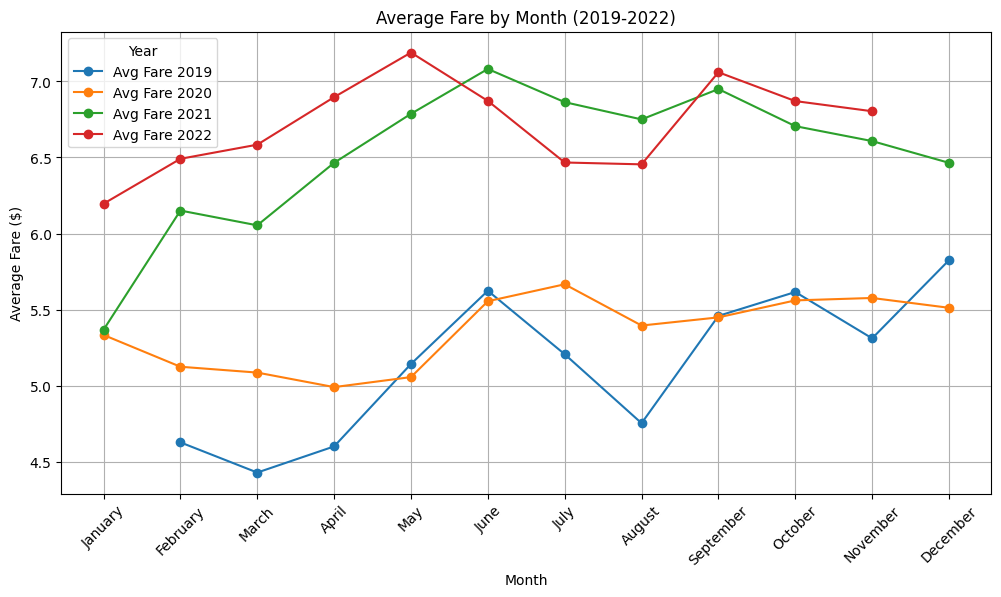

In [8]:
# Plot the data for each year
plt.figure(figsize=(12, 6))

# Create a list of months to be plotted
month_list = ordered_months

# Plot the data for each year
for year in [2019, 2020, 2021, 2022]:
    # Filter data for the specific year
    year_data = monthly_avg_fare[monthly_avg_fare['year'] == year]
    
    # Make sure the year data has all 12 months, even if some months are missing
    year_data = year_data.set_index('month').reindex(month_list).reset_index()
    
    # Plot the data for this year
    plt.plot(year_data['month'], year_data['avg_fare'], marker="o", label=f"Avg Fare {year}")

# Customize plot
plt.xlabel("Month")
plt.ylabel("Average Fare ($)")
plt.title("Average Fare by Month (2019-2022)")
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.grid(True)
plt.legend(title="Year")

# Show plot
plt.show()